### Sentiment Analysis of Movie Reviews 
The project will base on using the previous reviews or probably comment of people perception about a certain movie to develop a modelthat will can predict the future perception. 
the data set for the project was gotten from Kaggle and it contain phrase and categories of the tagerted variable which is the sentiment.
Natural Language process mechanism will be use to process the data with NLtK python packages and supervise machine learning algorithm will be use for modelling
- The sentiment is categorize as 
#### 0 – negative, 1 - somewhat negative, 2 – neutral, 3 - somewhat positive, 4 – positive

### Task to Be Carry Out 
1. Reading the data using Pandas 
2. Performing of EDA on the Data Set 
3. Text Preprocessing (Tokenization, Stemming, and Lemmatization)
4. Features Extraction (TDIF)
5. Modelling(Naives Bayes Classifier, Random Forest)
6. Model Evaluation and Selection (GridSearch and Cross Validation)
7. COnfusion Matrix 

In [1]:
#Importation of the necessary Library 
import pandas as pd 
import numpy as np 
import nltk
from nltk.corpus import stopwords
import re 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sn 
%matplotlib inline 
plt.style.use ('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
#Advance Data Visualization 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

### Task 1.

In [2]:
#load in the data set 
data1 = pd.read_csv('Kaggle_Movies_Review.csv')
data1.head ()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


#### shape of the Data, information about the Data, Check for null value, and description of data  

In [4]:
#shape of the data
data1.shape

(156060, 4)

from the shape of the data set we have 156060 rows and 4 columns, the row signify the number of sample i.e the number of people that had one review or the other, while the colums contain the features and targeted array

In [45]:
#data information 
data1.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [46]:
#description of the data
data1.describe ()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [5]:
#Handling Missing Value 
data1.isnull().any ()

PhraseId      False
SentenceId    False
Phrase        False
Sentiment     False
dtype: bool

In [6]:
#dropping of uncessary column
data2 = data1.drop ('PhraseId', axis = 'columns')
data2.head ()

,SentenceId,Phrase,Sentiment
0,1,A series of escapades demonstrating the adage ...,1
1,1,A series of escapades demonstrating the adage ...,2
2,1,A series,2
3,1,A,2
4,1,series,2


In [39]:
data2['Sentiment'].value_counts ()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

### TASK 2: EDA  

few EDA concept will be carry out on the data set in order to view few features about the data set.

In [7]:
# Before this i will convert the sentiment colum into categorical data set 
mapping = {0: 'Negative',
           1: 'Sw_negative',
           2: 'Neutral',
           3: 'Sw_Positive',
           4: 'Positive'
          }
mapping
data2['Sentiment'] = data2['Sentiment'].map(mapping) 
data2['Sentiment'].head ()

0    Sw_negative
1        Neutral
2        Neutral
3        Neutral
4        Neutral
Name: Sentiment, dtype: object

In [52]:
data2. head(5)

,SentenceId,Phrase,Sentiment
0,1,A series of escapades demonstrating the adage ...,Sw_negative
1,1,A series of escapades demonstrating the adage ...,Neutral
2,1,A series,Neutral
3,1,A,Neutral
4,1,series,Neutral


In [57]:
data2.groupby('Sentiment').count ()['Phrase'].reset_index().sort_values(by = 'Phrase', ascending = False)

,Sentiment,Phrase
1,Neutral,79582
3,Sw_Positive,32927
4,Sw_negative,27273
2,Positive,9206
0,Negative,7072


In [8]:
# creation of data 3 which deos not contain sw_positive and sw_negative
data3 = data2[(data2['Sentiment'] != 'Sw_negative') & (data2['Sentiment'] != 'Sw_Positive')]
data3['Sentiment'].value_counts()

Neutral     79582
Positive     9206
Negative     7072
Name: Sentiment, dtype: int64

In [70]:
print ('first data shaape is:', data1.shape)
print ('third data shape is:', data3.shape)

first data shaape is: (156060, 4)
third data shape is: (95860, 3)


In [9]:
df_f = data3.groupby('Sentiment').count ()['Phrase'].reset_index().sort_values(by = 'Phrase', ascending = False)
df_f.style.background_gradient(cmap='Purples')

,Sentiment,Phrase
1,Neutral,79582
2,Positive,9206
0,Negative,7072


the display the count of review of pple with respect to the phrase, in the absence of sw_positive and sw_negative as they where not specifying indeed what is actually there opinon,from the table above the shaded part of the figure display the highest count, hence more pple review about the movie is neutral.

Text(0,0.5,'count')

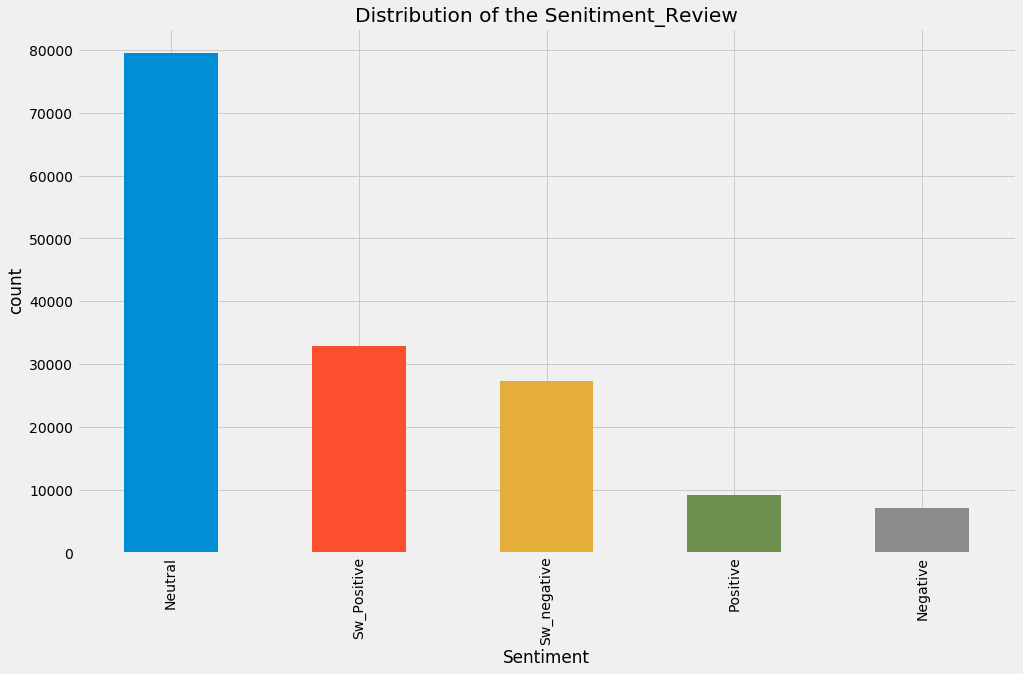

In [76]:
data2['Sentiment'].value_counts (). plot.bar(figsize = (15,9))
plt.title('Distribution of the Senitiment_Review')
plt.xlabel('Sentiment')
plt.ylabel('count')

The Bar plot above represent graphical distribution of sentiment count regarding the review of pple on the movie containing both somewhat negative and somewhat positive, from the chart we can picture that majority of reviews fall with the range of Neutral to somewhat negative, while positive and negative sentiment have a slight discreprancy. this report show that majority of the pple reviews portray in decision and in difference, this is also backed up in the count Table. 

Text(0,0.5,'count')

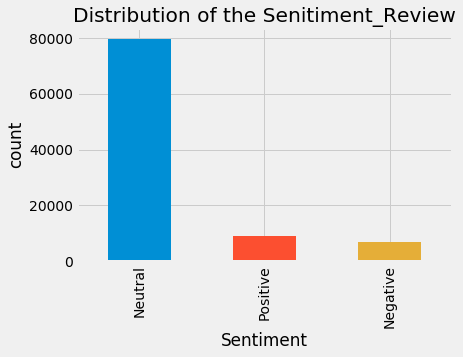

In [77]:
data3['Sentiment'].value_counts (). plot.bar()
plt.title('Distribution of the Senitiment_Review')
plt.xlabel('Sentiment')
plt.ylabel('count')

for both chart Neutral reposnse display high frequecy than the rest of the response, over the review of the movie, it can also be deduce from the chart that majority of the respondent are indifference as regard the movie, considering the response of positive and negative in comparison with neutral, sw positive , and sw negative. 

In [78]:
df_f.head ()

,Sentiment,Phrase
1,Neutral,79582
2,Positive,9206
0,Negative,7072


In [10]:
#funle area 
fig = go.Figure(go.Funnelarea(
    text =df_f.Sentiment,
    values = df_f.Phrase,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [12]:
df_f1 = data2.groupby('Sentiment').count ()['Phrase'].reset_index().sort_values(by = 'Sentiment', ascending = False)
df_f1

,Sentiment,Phrase
4,Sw_negative,27273
3,Sw_Positive,32927
2,Positive,9206
1,Neutral,79582
0,Negative,7072


In [13]:
fig = go.Figure(go.Funnelarea(
    text =df_f1.Sentiment,
    values = df_f1.Phrase,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [103]:
data2.columns 
data2.groupby('SentenceId').describe ()

Phrase                                                            \
            count unique                                                top   
SentenceId                                                                    
1              63     63                                                 is   
2              18     18                                   is worth seeking   
3              35     35                                            suspect   
4              40     40      a Shakespearean tragedy or a juicy soap opera   
5              10     10                                       manipulative   
6              32     32                                        proportions   
7              15     15                                            Trouble   
8              34     34                                              thick   
9              12     12                                              leave   
10             12     12                could hate it for the same reason .   
11             35     35                                  perverse escapism   
12             46     46                      to be in a martial-arts flick   
13             11     11                                are an absolute joy   
14             44     44  distort our perspective and throw us off the p...   
15             16     16                                    better judgment   
16             35     35                                    baseball movies   
17             15     15                              a bilingual charmer ,   
18             43     43                                            Love --   
19             20     20                                 The Wild Wild West   
20             15     15                      'd expect -- but nothing more   
21             12     12                                        of the year   
22             56     56                                         case study   
23             28     28                             going to a house party   
24             39     39                                            7 times   
25             16     16                                           romantic   
26             23     23                                             almost   
27             16     16              preach exclusively to the converted .   
28             45     45                                  occasional smiles   
29             24     24                                             Arthur   
30             29     29                                           actually   
...           ...    ...                                                ...   
8514           14     14                        could make in filming opera   
8515           23     23                          Robert Altman , Spike Lee   
8516           19     19                                       Driver-esque   
8517           20     20                                     Campbell Scott   
8518           13     13  fascination , and generates a fair amount of B...   
8519           21     21  its parade of almost perpetually wasted charac...   
8520           27     27                  -LRB- excepting Love Hewitt -RRB-   
8521            6      6                A witty , whimsical feature debut .   
8522            4      4                                     Exhilarating ,   
8523           18     18     , Kung Pow sets a new benchmark for lameness .   
8524           12     12                  a heavy-handed moralistic message   
8525           31     31                                   so-called satire   
8526           16     16                                     it thumbs down   
8527           22     22  sealed in a jar and left on a remote shelf ind...   
8528           16     16                                  small-budget film   
8529           18     18  The underworld urban angst is derivative of Ma...   
8531           13     13                                     

In [105]:
data1.head (5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


### Task2B:
This section cover the frequency distribution of most recent word and the graphical representation using barchart and wordcloud 

In [147]:
# countvectorizer was used to convert the text in the data set directly without cleaning in order to extract the word_vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data1.Phrase)
sum_words = words.sum(axis=0)

#creating vocabulary contain in the data set and the count number for frequecy distribution inspection
word_n_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
word_n_freq = sorted(word_n_freq, key = lambda x: x[1], reverse = True)
frequency_dist = pd.DataFrame(word_n_freq, columns=['word', 'freq'])

Text(0.5,1,'Most Frequently Occuring Words - Top 30')

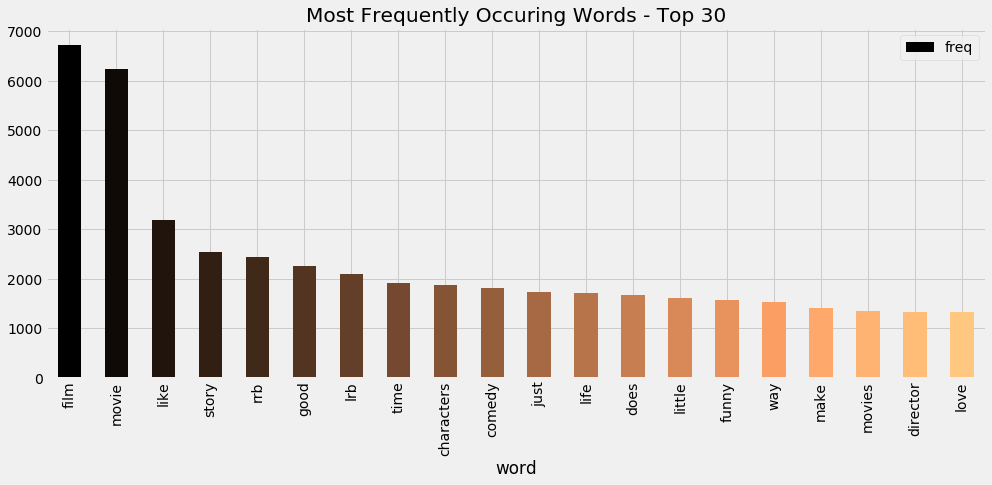

In [149]:
#Graphical Representation of the Frequecy distribution of fist 30 words 
plt.style.use('fivethirtyeight')
color = plt.cm.copper(np.linspace(0, 1, 20))
frequency_dist.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 30")

The Graph above display the graphical representation of the first 30 frequent word phrase about the movie, as this guide us to get the overview of people percetion about the movie and most used words in the review 
Noted from the chart, it observed that 'film, movie, and like are the most found word in the reviews,movie and film were used synonymously. This result deduce that people actualy talked more about the movie and as well like it, also words like "comdey","funny", and "love" shows that people actual found the movie funny and loved it.

Text(0.5,1,'Vocabulary from Movie_Reviews')

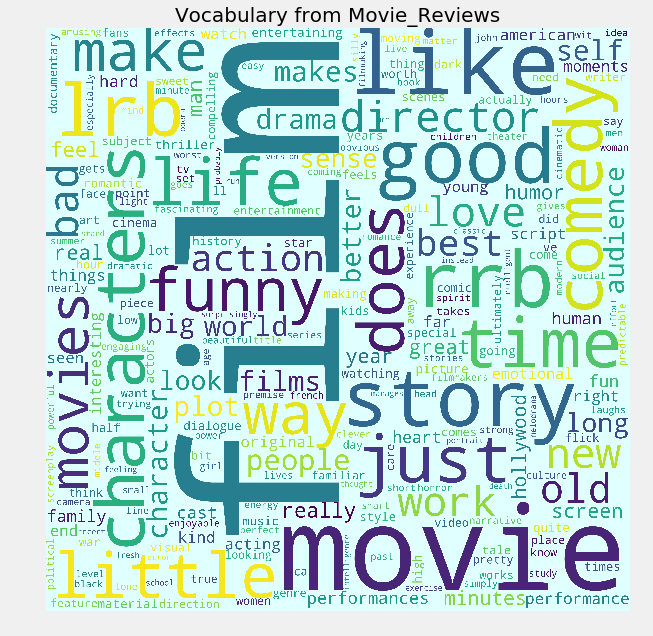

In [152]:
#Graphical representation using wordcloud 
from wordcloud import WordCloud
wrd_cloud = WordCloud(background_color = 'lightcyan',width = 4000, height = 4000, max_words=250).generate_from_frequencies(dict(word_n_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wrd_cloud)
plt.title("Vocabulary from Movie_Reviews", fontsize = 20)

the wordcloud figure above back the bar chart interpretation up with (film, movie, and like) been the most used word.

### TASK 3: Cleaning and Text Preprocessing 

The section below cover the data cleaning and text preprocessing, the following will be carried out:
1. removing of non letter with regx
2. removing of stopwords 
3. spliting of the text
4. Lemmatiziation

In [3]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
lemma = WordNetLemmatizer ()
import warnings
warnings.filterwarnings('ignore')

In [4]:
corpus = []
for word in range(0,len(data1)):
    #remove non punctuation 
    phrase = re.sub('[^a-zA-Z]', ' ', data1['Phrase'][word])
    #lower key 
    phrase_nw = phrase.lower()
    
    #split 
    phrase_nw= phrase_nw.split()
    
    #lemmatize 
    review = [lemma.lemmatize(word) for word in phrase_nw if not word in stopwords.words('english')]
    
    review = ' '.join(review)
    corpus.append(review)

In [5]:
len(corpus)

156060

In [7]:
corpus[:10]

['series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story',
 'series escapade demonstrating adage good goose',
 'series',
 '',
 'series',
 'escapade demonstrating adage good goose',
 '',
 'escapade demonstrating adage good goose',
 'escapade',
 'demonstrating adage good goose']

### Task 3b:
1. conversion of text into feature array using TDIF
2. defining the feature array and the targeted variable
3. spliting of data set into train n test 

*** TFID-VECTORIZER***

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#setting up the format tfidfvectorizer 
tf_df=TfidfVectorizer(max_features=5000,ngram_range=(1,3))

#fit in the transformation 
X = tf_df.fit_transform(corpus).toarray()


In [11]:
feature_nw = tf_df.get_feature_names ()
fet = pd.DataFrame(X,columns = feature_nw)

In [12]:
fet.head (5)

,abandon,ability,able,absolute,absolutely,absorbing,abstract,absurd,absurdity,abundant,...,young men,young woman,younger,youth,youthful,zeal,zero,zhang,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
y = data1['Sentiment']

In [52]:
y.head()

0    1
1    2
2    2
3    2
4    2
Name: Sentiment, dtype: int64

In [40]:
print(X.shape)
print(y.shape)

(156060, 5000)
(156060,)


*** BAG OF WORD ***

In [78]:
cv = CountVectorizer (max_features = 5000, ngram_range=(1,3))

In [57]:
X = cv.fit_transform (corpus).toarray () 

In [58]:
X.shape

(156060, 2500)

In [41]:
#train split 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.35, random_state = 15)

In [17]:
tf_df.get_feature_names()[:10]

['abandon',
 'ability',
 'able',
 'absolute',
 'absolutely',
 'absorbing',
 'abstract',
 'absurd',
 'absurdity',
 'abundant']

In [42]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler ()
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

### Task 4: Modeling 

***Random Forest***, ***MultinomialNB***

In [61]:
from sklearn.naive_bayes import MultinomialNB
class_fy=MultinomialNB(alpha = 0.0)

In [16]:
from sklearn import metrics
import numpy as np
import itertools

In [63]:
class_fy.fit(X_train,y_train)

MultinomialNB(alpha=0.0, class_prior=None, fit_prior=True)

In [64]:
pred_value = class_fy.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test,pred_value)
conf_mat = metrics.confusion_matrix(y_test,pred_value)

In [65]:
accuracy_score

0.5911462624265392

Considering the poor performance of the model after several tweaking of the parameter, have decided to perform k cross validation in order to select the right model for the data set 

In [43]:
# applying k fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = class_fy, X = X_train, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.5888485299590775
Standard Variance : 0.003586294072964616


In [44]:
accuracies

array([0.58652878, 0.59494829, 0.59051803, 0.5867814 , 0.58403515,
       0.58427172, 0.58628582, 0.59049712, 0.59141262, 0.59320637])

In [166]:
classifer = MultinomialNB(alpha=0.1)

After several tweaking on the performance of the model tested on the data, the average accuracies of 10 validation was 0.58 this still portray poor model which is not fit for accurate prediction of the data set. in light of this a sophisticated classification algorithm is needed 

*** Random Forest***


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))


Training Accuracy : 0.823864588570471
Testing Accuracy : 0.6218670474725838


In [18]:
accurate_sc = metrics.accuracy_score(y_test,y_pred)
accurate_sc

0.6218670474725838

the testing accuracy score of the model of (0.62) shows that the model will predict the 67% of the new targeted variable, this is a bit low and probably not too reliable. in light of this deep learning algorithm like LSTM can be applied on the data set for more accurate prediction 

### GridSearchCV
We going to pull through this mechanism under five steps:
1. Perform the GridSearchCV under various parameters of the classifier 
2. Fit the result of step 1 into X_train,y_train 
3. Get the Best Paramter produce from step 2 
4. Ues the Best Parameter to fit a new Classification model (RD)
5. Perform K-fold CV on the model.

In [58]:
#STEP 1:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {
            'bootstrap':[True],
            'max_depth':[80, 100],
            'min_samples_split': [8, 12],
            'n_estimators':[100, 500]
    
}



In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
grid = GridSearchCV (estimator= model, 
                     param_grid = parameters, 
                     cv = 10, scoring = 'accuracy',
                     return_train_score = True,
                    n_jobs = -1)


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

cv_object = StratifiedKFold(n_splits = 2)

model = RandomForestClassifier()
grid = GridSearchCV (estimator= model, param_grid = parameters, cv = cv_object, return_train_score = True)



In [54]:
y_train.head ()

65026     3
103037    2
93500     2
112407    0
148551    2
Name: Sentiment, dtype: int64

In [60]:
#STEP2: Fit the Result of Step_1
gsc_result = grid.fit(X_train,y_train.ravel())

JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000028285002F60, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000028285002F60, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\ProgramData\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\ProgramData\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(516, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\ProgramData\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(516, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (516, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=516, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '#STEP2: Fit the Result of Step_1\ngsc_result = grid.fit(X_train,y_train.ravel())', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2021, 3, 3, 15, 55, 16, 176426, tzinfo=tzutc()), 'msg_id': '39e674e7e3e4421b841067d7ef8dbf9a', 'msg_type': 'execute_request', 'session': '6190d88f0cb045b88782287a24a7aeee', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '39e674e7e3e4421b841067d7ef8dbf9a', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'6190d88f0cb045b88782287a24a7aeee']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '#STEP2: Fit the Result of Step_1\ngsc_result = grid.fit(X_train,y_train.ravel())', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2021, 3, 3, 15, 55, 16, 176426, tzinfo=tzutc()), 'msg_id': '39e674e7e3e4421b841067d7ef8dbf9a', 'msg_type': 'execute_request', 'session': '6190d88f0cb045b88782287a24a7aeee', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '39e674e7e3e4421b841067d7ef8dbf9a', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'6190d88f0cb045b88782287a24a7aeee'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '#STEP2: Fit the Result of Step_1\ngsc_result = grid.fit(X_train,y_train.ravel())', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2021, 3, 3, 15, 55, 16, 176426, tzinfo=tzutc()), 'msg_id': '39e674e7e3e4421b841067d7ef8dbf9a', 'msg_type': 'execute_request', 'session': '6190d88f0cb045b88782287a24a7aeee', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '39e674e7e3e4421b841067d7ef8dbf9a', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='#STEP2: Fit the Result of Step_1\ngsc_result = grid.fit(X_train,y_train.ravel())', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '#STEP2: Fit the Result of Step_1\ngsc_result = grid.fit(X_train,y_train.ravel())'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('#STEP2: Fit the Result of Step_1\ngsc_result = grid.fit(X_train,y_train.ravel())',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('#STEP2: Fit the Result of Step_1\ngsc_result = grid.fit(X_train,y_train.ravel())',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='#STEP2: Fit the Result of Step_1\ngsc_result = grid.fit(X_train,y_train.ravel())', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = '#STEP2: Fit the Result of Step_1\ngsc_result = grid.fit(X_train,y_train.ravel())'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='#STEP2: Fit the Result of Step_1\ngsc_result = grid.fit(X_train,y_train.ravel())', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>], cell_name='<ipython-input-60-fac294b44ba7>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 282ab4685f8, executio...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000002842F708420, file "<ipython-input-60-fac294b44ba7>", line 2>
        result = <ExecutionResult object at 282ab4685f8, executio...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000002842F708420, file "<ipython-input-60-fac294b44ba7>", line 2>, result=<ExecutionResult object at 282ab4685f8, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000002842F708420, file "<ipython-input-60-fac294b44ba7>", line 2>
        self.user_global_ns = {'BeautifulSoup': <class 'bs4.BeautifulSoup'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'ImageColorGenerator': <class 'wordcloud.color_from_image.ImageColorGenerator'>, 'In': ['', '#train split \n\nfrom sklearn.model_selection impo...t_split(X,y, test_size = 0.35, random_state = 15)', '#Importation of the necessary Library \nimport pa...nected = True)\nimport plotly.figure_factory as ff', "#load in the data set \ndata1 = pd.read_csv('Kaggle_Movies_Review.csv')\ndata1.head ()", "from nltk.stem import WordNetLemmatizer \nfrom nl...import warnings\nwarnings.filterwarnings('ignore')", "corpus = []\nfor word in range(0,len(data1)):\n   ...view = ' '.join(review)\n    corpus.append(review)", 'len(corpus)', 'corpus[:10]', 'from sklearn.feature_extraction.text import Coun...mation \nX = tf_df.fit_transform(corpus).toarray()', '#train split \n\nfrom sklearn.model_selection impo...t_split(X,y, test_size = 0.35, random_state = 15)', "y = data1['Sentiment']", 'print(X.shape)\nprint(y.shape)', '#train split \n\nfrom sklearn.model_selection impo...t_split(X,y, test_size = 0.35, random_state = 15)', 'from sklearn.preprocessing import MinMaxScaler\nM...nsform(X_train)\nX_test = MinMax.transform(X_test)', 'from sklearn.ensemble import RandomForestClassif...Testing Accuracy :", model.score(X_test, y_test))', 'cm = confusion_matrix(y_test, y_pred)\nprint(cm)', 'from sklearn import metrics\nimport numpy as np\nimport itertools', 'accurate_sc = metrics.accuracy_score(y_test,y_pred)', 'accurate_sc = metrics.accuracy_score(y_test,y_pred)\naccurate_sc', '#STEP 1:\n# Applying Grid Search to find the best...\nfrom sklearn.model_selection import GridSearchCV', ...], 'MinMax': MinMaxScaler(copy=True, feature_range=(0, 1)), 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {3:    PhraseId  SentenceId                         ... 2  
2          2  
3          2  
4          2  , 6: 156060, 7: ['series escapade demonstrating adage good goose a...gander occasionally amuses none amount much story', 'series escapade demonstrating adage good goose', 'series', '', 'series', 'escapade demonstrating adage good goose', '', 'escapade demonstrating adage good goose', 'escapade', 'demonstrating adage good goose'], 18: 0.6218670474725838, 24:    PhraseId  SentenceId                         ... 2  
2          2  
3          2  
4          2  , 26:    SentenceId                                   ...                                series          2, 27: 0    Sw_negative
1        Neutral
2        Neutr...l
4        Neutral
Name: Sentiment, dtype: object, 29: Neutral     79582
Positive     9206
Negative     7072
Name: Sentiment, dtype: int64, 30: <pandas.io.formats.style.Styler object>, 33:      Sentiment  Phrase
4  Sw_negative   27273
3 ...206
1      Neutral   79582
0     Negative    7072, ...}, 'PorterStemmer': <class 'nltk.stem.porter.PorterStemmer'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
        self.user_ns = {'BeautifulSoup': <class 'bs4.BeautifulSoup'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'ImageColorGenerator': <class 'wordcloud.color_from_image.ImageColorGenerator'>, 'In': ['', '#train split \n\nfrom sklearn.model_selection impo...t_split(X,y, test_size = 0.35, random_state = 15)', '#Importation of the necessary Library \nimport pa...nected = True)\nimport plotly.figure_factory as ff', "#load in the data set \ndata1 = pd.read_csv('Kaggle_Movies_Review.csv')\ndata1.head ()", "from nltk.stem import WordNetLemmatizer \nfrom nl...import warnings\nwarnings.filterwarnings('ignore')", "corpus = []\nfor word in range(0,len(data1)):\n   ...view = ' '.join(review)\n    corpus.append(review)", 'len(corpus)', 'corpus[:10]', 'from sklearn.feature_extraction.text import Coun...mation \nX = tf_df.fit_transform(corpus).toarray()', '#train split \n\nfrom sklearn.model_selection impo...t_split(X,y, test_size = 0.35, random_state = 15)', "y = data1['Sentiment']", 'print(X.shape)\nprint(y.shape)', '#train split \n\nfrom sklearn.model_selection impo...t_split(X,y, test_size = 0.35, random_state = 15)', 'from sklearn.preprocessing import MinMaxScaler\nM...nsform(X_train)\nX_test = MinMax.transform(X_test)', 'from sklearn.ensemble import RandomForestClassif...Testing Accuracy :", model.score(X_test, y_test))', 'cm = confusion_matrix(y_test, y_pred)\nprint(cm)', 'from sklearn import metrics\nimport numpy as np\nimport itertools', 'accurate_sc = metrics.accuracy_score(y_test,y_pred)', 'accurate_sc = metrics.accuracy_score(y_test,y_pred)\naccurate_sc', '#STEP 1:\n# Applying Grid Search to find the best...\nfrom sklearn.model_selection import GridSearchCV', ...], 'MinMax': MinMaxScaler(copy=True, feature_range=(0, 1)), 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'Out': {3:    PhraseId  SentenceId                         ... 2  
2          2  
3          2  
4          2  , 6: 156060, 7: ['series escapade demonstrating adage good goose a...gander occasionally amuses none amount much story', 'series escapade demonstrating adage good goose', 'series', '', 'series', 'escapade demonstrating adage good goose', '', 'escapade demonstrating adage good goose', 'escapade', 'demonstrating adage good goose'], 18: 0.6218670474725838, 24:    PhraseId  SentenceId                         ... 2  
2          2  
3          2  
4          2  , 26:    SentenceId                                   ...                                series          2, 27: 0    Sw_negative
1        Neutral
2        Neutr...l
4        Neutral
Name: Sentiment, dtype: object, 29: Neutral     79582
Positive     9206
Negative     7072
Name: Sentiment, dtype: int64, 30: <pandas.io.formats.style.Styler object>, 33:      Sentiment  Phrase
4  Sw_negative   27273
3 ...206
1      Neutral   79582
0     Negative    7072, ...}, 'PorterStemmer': <class 'nltk.stem.porter.PorterStemmer'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\User\Desktop\CMP 7202-WEB\ass_code\<ipython-input-60-fac294b44ba7> in <module>()
      1 #STEP2: Fit the Result of Step_1
----> 2 gsc_result = grid.fit(X_train,y_train.ravel())

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=10, error_score='raise',
       ...score=True,
       scoring='accuracy', verbose=0), X=array([[0., 0., 0., ..., 0., 0., 0.],
       [0...., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), y=array([3, 2, 2, ..., 3, 2, 1], dtype=int64), groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...d(n_splits=10, random_state=None, shuffle=False)>
        X = array([[0., 0., 0., ..., 0., 0., 0.],
       [0...., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
        y = array([3, 2, 2, ..., 3, 2, 1], dtype=int64)
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Wed Mar  3 16:00:57 2021
PID: 9664                 Python 3.6.5: C:\ProgramData\Anaconda3\python.exe
...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), memmap([[0., 0., 0., ..., 0., 0., 0.],
        [... 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([3, 2, 2, ..., 3, 2, 1], dtype=int64), {'score': make_scorer(accuracy_score)}, array([     0,      1,      2, ..., 101436, 101437, 101438]), array([ 9850,  9878,  9940, ..., 20751, 20756, 20775]), 0, {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), memmap([[0., 0., 0., ..., 0., 0., 0.],
        [... 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([3, 2, 2, ..., 3, 2, 1], dtype=int64), {'score': make_scorer(accuracy_score)}, array([     0,      1,      2, ..., 101436, 101437, 101438]), array([ 9850,  9878,  9940, ..., 20751, 20756, 20775]), 0, {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=memmap([[0., 0., 0., ..., 0., 0., 0.],
        [... 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), y=array([3, 2, 2, ..., 3, 2, 1], dtype=int64), scorer={'score': make_scorer(accuracy_score)}, train=array([     0,      1,      2, ..., 101436, 101437, 101438]), test=array([ 9850,  9878,  9940, ..., 20751, 20756, 20775]), verbose=0, parameters={'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    443     if parameters is not None:
    444         estimator.set_params(**parameters)
    445 
    446     start_time = time.time()
    447 
--> 448     X_train, y_train = _safe_split(estimator, X, y, train)
        X_train = undefined
        y_train = undefined
        estimator = RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False)
        X = memmap([[0., 0., 0., ..., 0., 0., 0.],
        [... 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])
        y = array([3, 2, 2, ..., 3, 2, 1], dtype=int64)
        train = array([     0,      1,      2, ..., 101436, 101437, 101438])
    449     X_test, y_test = _safe_split(estimator, X, y, test, train)
    450 
    451     is_multimetric = not callable(scorer)
    452     n_scorers = len(scorer.keys()) if is_multimetric else 1

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py in _safe_split(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=memmap([[0., 0., 0., ..., 0., 0., 0.],
        [... 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), y=array([3, 2, 2, ..., 3, 2, 1], dtype=int64), indices=array([     0,      1,      2, ..., 101436, 101437, 101438]), train_indices=None)
    195         if train_indices is None:
    196             X_subset = X[np.ix_(indices, indices)]
    197         else:
    198             X_subset = X[np.ix_(indices, train_indices)]
    199     else:
--> 200         X_subset = safe_indexing(X, indices)
        X_subset = undefined
        X = memmap([[0., 0., 0., ..., 0., 0., 0.],
        [... 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])
        indices = array([     0,      1,      2, ..., 101436, 101437, 101438])
    201 
    202     if y is not None:
    203         y_subset = safe_indexing(y, indices)
    204     else:

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py in safe_indexing(X=memmap([[0., 0., 0., ..., 0., 0., 0.],
        [... 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), indices=array([     0,      1,      2, ..., 101436, 101437, 101438]))
    155             return X.copy().iloc[indices]
    156     elif hasattr(X, "shape"):
    157         if hasattr(X, 'take') and (hasattr(indices, 'dtype') and
    158                                    indices.dtype.kind == 'i'):
    159             # This is often substantially faster than X[indices]
--> 160             return X.take(indices, axis=0)
        X.take = <built-in method take of memmap object>
        indices = array([     0,      1,      2, ..., 101436, 101437, 101438])
    161         else:
    162             return X[indices]
    163     else:
    164         return [X[idx] for idx in indices]

MemoryError: Unable to allocate 3.40 GiB for an array with shape (91293, 5000) and data type float64
___________________________________________________________________________

In [ ]:
#STEP 3: GET THE BEST PARAMETER
bst_rslt = gsc_result.best_params_
#GET BEST PARAMETER ACCURACY
accuracy = gsc_result.best_score_
accuracy
